# **BERT Topic Modeling 2018**

In [1]:
import pandas as pd
import numpy as np

In [2]:
file =  r'processed_sentiment.csv'
df = pd.read_csv(file)

In [3]:
df.tail(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,useful,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label
42420,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,1,0,0,Santa Barbara has lots of good pizza. \nThis o...,2018-10-18 20:35:16,2018,10,santa barbara lot good pizza one one best offe...,0.8860,positive
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,8,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423,positive


In [4]:
# Filter to just 2018

# Filter the DataFrame to include only rows where 'year' is equal to 2018
df_2018 = df[df['year'] == 2018]

# Now df_2018 contains only the rows where 'year' is 2018


In [5]:
df_2018.shape

(23061, 27)

In [7]:
# Create a new column containing the length each headline text

# Convert float values to strings in 'processed_text' column
df_2018['processed_text'] = df_2018['processed_text'].astype(str)

# Create a new column containing the length of each headline text
df_2018["text_len"] = df_2018["processed_text"].apply(lambda x: len(x.split()))


<ipython-input-7-d95ed61afb0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['processed_text'] = df_2018['processed_text'].astype(str)
<ipython-input-7-d95ed61afb0e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018["text_len"] = df_2018["processed_text"].apply(lambda x: len(x.split()))


In [8]:
df_2018.tail(1)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,funny,cool,text,date,year,month,processed_text,sentiment_score,sentiment_label,text_len
42421,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,5,6,Solid pizza and beer at Pizza Guru. I choose ...,2018-07-22 13:31:09,2018,7,solid pizza beer pizza guru choose bbq pizza m...,0.5423,positive,58


In [9]:
print("The longest review length has: {} words".format(df_2018.text_len.max()))

The longest review length has: 470 words


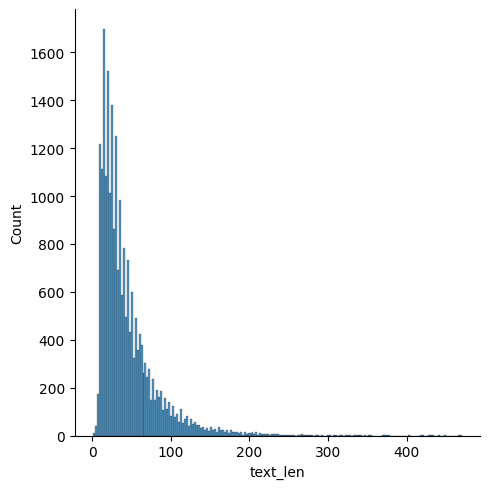

In [10]:
# Visualize the length distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df_2018.text_len, kde=False)

- **Installing/Running Bert**

In [11]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 14.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039296 sha256=e9f0d5005b51b566fa8e19d55fc5d3edb6a48bf00bc7983065b97d0afbf2f3d2
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-l

In [12]:
from bertopic import BERTopic
from umap import UMAP

In [13]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15,
                  n_components=5,
                  metric='cosine',
                  random_state=100)
# Initiate BERTopic
model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
# Run BERTopic model
headline_topics, probabilities = model.fit_transform(df_2018.processed_text)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head(6)

Number of topics: 133


,Topic,Count,Name,Representation,Representative_Docs
0,-1,12886,-1_food_place_good_great,"[food, place, good, great, service, time, back...",[wife stopped way sb looking yelp saw ton good...
1,0,761,0_coffee_latte_shop_starbucks,"[coffee, latte, shop, starbucks, espresso, mil...",[thrilled addition lighthouse coffee mesa ligh...
2,1,529,1_rude_said_minute_customer,"[rude, said, minute, customer, order, table, m...",[wasnt going write review consistent issue nee...
3,2,519,2_breakfast_egg_benedict_pancake,"[breakfast, egg, benedict, pancake, toast, bru...",[brunch absolutely amazing get delicious food ...
4,3,512,3_great_service_food_atmosphere,"[great, service, food, atmosphere, friendly, a...",[place great food excellent service fantastic ...
5,4,447,4_pizza_crust_topping_slice,"[pizza, crust, topping, slice, thin, pepperoni...",[pizza love pizza best california pizza unbeli...


- **Visualizations**

In [15]:
model.visualize_barchart(top_n_topics=6)

In [16]:
# Intertropic distance (showing for each topic the corresponding words and their score)

#embed c-TF-IDF representation of the topics in 2D using UMAP and then visualize the two dimensions
model.visualize_topics(top_n_topics=6)

In [17]:
# Topic Hierarchy (All these information can help the user better understand the reason why the topics have been considered to be similar one to another)

#show all hierarchy
#model.visualize_hierarchy()

#show top 6 topics
model.visualize_hierarchy(top_n_topics=6)

In [18]:
# For Topic probabilities

print('Row numbers: '+ str(len(probabilities))+' and Topic probabilities in each Row: ' +str(len(probabilities[0])))

Row numbers: 23061 and Topic probabilities in each Row: 132


In [19]:
#show Distribution of topic probabilities in row 2
model.visualize_distribution(probabilities[1],0.0002) #min_probability=0.0002

In [20]:
#Transfer to time format
df_2018['combined_date'] = df_2018['year'].astype(str) + '-' + df_2018['month'].astype(str)

#Create topics over time
topics_over_time = model.topics_over_time(df_2018.processed_text, timestamps=df_2018.combined_date, nr_bins=20)

In [21]:
model.visualize_topics_over_time(topics_over_time, topics = [0, 1, 2, 3, 4, 5])

In [23]:
# Convert 'processed_text' column to string data type
df_2018['processed_text'] = df_2018['processed_text'].astype(str)

docs = df_2018['processed_text']
classes = df_2018['sentiment_label']

# Create topics per class
topics_per_class = model.topics_per_class(docs, classes=classes)

# Visualize topics per class
model.visualize_topics_per_class(topics_per_class)


In [24]:
# Summary statistics
print(df_2018.describe())

        postal_code      latitude     longitude       stars_x  review_count  \
count  23061.000000  23061.000000  23061.000000  23061.000000  23061.000000   
mean   93100.743029     34.422657   -119.717220      4.019362    660.781666   
std       58.378818      0.087444      0.079195      0.502945    731.751236   
min    93013.000000     34.394661   -120.083748      1.500000      5.000000   
25%    93101.000000     34.413472   -119.741401      4.000000    197.000000   
50%    93101.000000     34.420334   -119.700150      4.000000    389.000000   
75%    93109.000000     34.429062   -119.690633      4.500000    885.000000   
max    96161.000000     39.382812   -119.511501      5.000000   3834.000000   

            is_open       stars_y        useful         funny          cool  \
count  23061.000000  23061.000000  23061.000000  23061.000000  23061.000000   
mean       0.843502      4.053337      0.844586      0.319934      0.514895   
std        0.363335      1.352239      3.695940    